# Ukrainian Greenhouse Gas Emissions Analysis (2016 - 2021)

**Project Task**

The goal of this project is to analyze greenhouse gas emissions data specific to Ukraine, sourced from the State Statistics Service of Ukraine (ukrstat.gov.ua). The primary objective is to present this data in a clear and understandable manner, allowing for deeper analysis and insights into air pollution trends within the country.

**Project Goals**

1. Present a subset of greenhouse gas emissions data from the State Statistics Service of Ukraine in a manner that is accessible and understandable to everyone.

2. Manipulate the data as necessary to prepare it for analysis, including cleaning, organizing, and potentially aggregating and summarizing it for deeper insights.

3. Conduct exploratory data analysis to extract insights and trends from the presented data, focusing specifically on air pollution trends within Ukraine over the period of 2016-2021.

**Data Description**

The greenhouse gas emissions data was sourced from ukrstat.gov.ua and underwent preliminary cleaning in Excel. The resulting datasets are named emissions_2016, emissions_2017, emissions_2018, emissions_2019, emissions_2020, and emissions_2021. It should be noted that some datasets may contain missing values.

The datasets comprise tables with categories representing the sectors or activities where greenhouse gases are emitted, and greenhouse compounds representing the specific gases emitted.

Categories:

    Agriculture, forestry and fishing
    Mining and quarrying
    Manufacturing
    Electricity, gas, steam, and air conditioning supply
    Water supply; sewerage, waste management, and remediation activities
    Construction
    Wholesale and retail trade; repair of motor vehicles and motorcycles
    Transport, warehousing, postal, and courier activities*
    Accommodation and food service activities
    Information and telecommunications
    Financial and insurance activities
    Real estate activities
    Professional, scientific, and technical activities
    Administrative and support service activities
    Public administration and defence; compulsory social security
    Education
    Human health activities, residential care activities, and social work
    Arts, entertainment, and recreation
    Other service activities
    Domestic Transportation**
    Household Heating

Greenhouse Compounds:

    Nitrogen oxides (NO2)
    Sulphur oxides (SO2)
    Ammonia (NH3)
    Non-methane volatile organic compounds
    Carbon monoxide (CO)
    Particulate matters > 10μm (PM10)
    Particulate matters < 2.5μm (PM2_5)
    Hydrofluorocarbons, in tonnes of CO2-equivalent (HFCs)
    Sulphur hexafluoride, in tonnes of CO2-equivalent (SF6)
    Nitrous oxide, in tonnes (N2O)
    Methane, in tonnes (CH4)
    Carbon dioxide (without emissions from biomass used as a fuel), in thousand tonnes (CO2)
    Carbon dioxide from biomass use as a fuel, in thousand tonnes (CO2_Bio)

!Most compound emissions in the datasets are measured in tonnes, except for 'Carbon dioxide (without emissions from biomass used as a fuel)' and 'Carbon dioxide from biomass use as a fuel,' which are in thousand tonnes (thsd. tonnes). Additionally, it's important to note that Hydrofluoro-carbons (HFCs) and sulphur hexafluoride (SF6) are expressed in tonnes CO2-equivalent, similar to other emissions data!


*this category includes transportation and logistics activities related to businesses, industries, and commercial operations.

** this category focuses on transportation activities associated with households and personal use.

## Data Preprocessing

In [346]:
import pandas as pd

In [347]:
emissions_2016 = pd.read_csv("emissions_2016.csv")

In [348]:
emissions_2016.head()

,Category,nitrogen oxides (NO2),sulphur oxides (SО2),ammonia (NH3),non-methane volatile organic compounds,carbon monoxide (CO),"particulate matters 2,5 mkm >10 mkm (PM10)",particulate matters < 2.5мкм (PM2_5),"hydrofluoro-carbons, tonnes CO2-equivalent (HFCs)","sulphur hexafluoride, tonnes CO2-equivalent (SF6)","nitrous oxide, tonnes (N2O)","methane, tonnes (CH4)","carbon dioxide (without emissions from biomass used as a fual), thsd.tonnes (СО2)","carbon dioxide from biomass uses as a fual, thsd.tonnes (СО2_Bio)",Unnamed: 14,Unnamed: 15,
0,"Agriculture, forestry and fishing",1286.659,1499.099,11888.814,1669.841,6510.211,3942.067,582.041,‒,‒,106961.669880,3.996541e+05,4311.980372,97.4,NaN,NaN,NaN
1,Mining and quarrying,11909.117,13530.134,94.315,5823.107,69703.864,12933.654,667.525,‒,‒,1151.953858,1.015437e+06,5792.044024,‒,NaN,NaN,NaN
2,Manufacturing,60405.838,61148.830,6238.827,29806.004,689521.214,13900.209,3904.625,887357.1,24312.3,6753.416359,6.582704e+04,75259.912813,286.2,NaN,NaN,NaN
3,"Electricity, gas, steam and air conditioning s...",146785.733,977446.574,22.775,7105.094,17170.504,37994.677,27668.108,‒,‒,1308.763930,7.309217e+05,98341.461431,3613.131790278925,NaN,NaN,NaN
4,"Water supply; sewerage, waste management and r...",439.614,620.618,237.501,46.579,1052.224,271.881,15.048,‒,‒,3561.435921,4.188581e+05,286.942121,5.031570680004127,NaN,NaN,NaN


In [349]:
#dropping the columns where all the values are missing
emissions_2016 = emissions_2016.dropna(axis=1, how="all")

The dataset contains missing values, and their presence can be attributed to two main factors:
1. Absence of Emissions.
Some missing values occur because certain compounds were not emitted within specific categories. This absence of emissions led to missing data points for those particular compounds in the corresponding categories.

2. Data Loss or Omission.
Additionally, some missing values were identified in the original datasets due to reasons unrelated to the underlying patterns of compound emissions. These instances of missing data were not reflective of specific emission patterns but rather resulted from data loss or omission for unclear reasons. It's essential to acknowledge that these missing values do not represent deliberate emission trends but rather stem from issues such as incomplete data collection or recording errors.

As part of the data preprocessing phase, it was decided to address the remaining missing values by replacing them with 0:

In [350]:
emissions_2016 = emissions_2016.fillna(0).replace({"‒": "0", "- ": "0", "…": "0"})

In [351]:
# to convert all my numeric values to decimals ('float')
emissions_2016.iloc[:,1:14] = emissions_2016.iloc[:,1:14].astype(float)

Columns 12 and 13 (both are CO2: one is CO2 excluded biomass, and the other is only biomass) are presented in thsd.tonnes. The next step is to convert them to tonnes:

In [352]:
emissions_2016.iloc[:,12] *= 1000
emissions_2016.iloc[:,13] *= 1000

Now the columns should be renamed:

In [353]:
emissions_2016.columns

Index(['Category', 'nitrogen oxides (NO2)', 'sulphur oxides (SО2)',
       'ammonia (NH3)', 'non-methane volatile organic compounds ',
       'carbon monoxide (CO)', 'particulate matters  2,5 mkm >10 mkm  (PM10)',
       'particulate matters < 2.5мкм (PM2_5)',
       'hydrofluoro-carbons, tonnes CO2-equivalent (HFCs)',
       'sulphur hexafluoride, tonnes CO2-equivalent (SF6)',
       'nitrous oxide, tonnes (N2O)', 'methane,    tonnes          (CH4)',
       'carbon dioxide (without emissions from biomass used as a fual), thsd.tonnes  (СО2)',
       'carbon dioxide from biomass uses as a fual, thsd.tonnes (СО2_Bio)'],
      dtype='object')

In [354]:
new_names = {
    'nitrogen oxides (NO2)': 'NO2 (Nitrogen Oxides)', 
    'sulphur oxides (SО2)': 'SO2 (Sulphur Oxides)',
    'ammonia (NH3)': 'NH3 (Ammonia)', 
    'non-methane volatile organic compounds ': 'NMVOC (Non-Methane Volatile Organic Compounds)',
    'carbon monoxide (CO)': 'CO (Carbon Monoxide)', 
    'particulate matters  2,5 mkm >10 mkm  (PM10)': 'PM10 (Particulate Matter ≤ 10 μm)',
    'particulate matters < 2.5мкм (PM2_5)': 'PM2.5 (Particulate Matter ≤ 2.5 μm)',
    'hydrofluoro-carbons, tonnes CO2-equivalent (HFCs)': "HFCs (Hydrofluoro-carbons)",
    'sulphur hexafluoride, tonnes CO2-equivalent (SF6)': "SF6 (Sulphur Hexafluoride)",
    'nitrous oxide, tonnes (N2O)': "N2O (Nitrous Oxide)", 
    'methane,    tonnes          (CH4)': "CH4 (Methane)",
    'carbon dioxide (without emissions from biomass used as a fual), thsd.tonnes  (СО2)': "CO2 (Carbon Dioxide Excluding Biomass)",
    'carbon dioxide from biomass uses as a fual, thsd.tonnes (СО2_Bio)':"CO2_Bio (Carbon Dioxide from Biomass)"
}

In [355]:
emissions_2016.rename(columns=new_names, inplace=True)

**Now let's do the exact same manipulations with the rest of my datasets:**

In [357]:
emissions_2017 = pd.read_csv("emissions_2017.csv")

In [358]:
emissions_2017.head()

,Category,nitrogen oxides (NO2),sulphur oxides (SО2),ammonia (NH3),non-methane volatile organic compounds,carbon monoxide (CO),"particulate matters 2,5 mkm >10 mkm (PM10)",particulate matters < 2.5мкм (PM2_5),"hydrofluoro-carbons, tonnes CO2-equivalent (HFCs)","sulphur hexafluoride, tonnes CO2-equivalent (SF6)","nitrous oxide, tonnes (N2O)","methane, tonnes (CH4)","carbon dioxide (without emissions from biomass used as a fual), thsd.tonnes (СО2)","carbon dioxide from biomass uses as a fual, thsd.tonnes (СО2_Bio)"
0,"Agriculture, forestry and fishing",1439.591,1156.789,10945.816,1468.145,8089.456,3751.448,886.588,‒,‒,104075.092941,393406.649729,4631.967207,124.85557833530065
1,Mining and quarrying,11367.347,11248.328,80.546,7295.116,64501.026,13410.367,479.102,‒,‒,1191.594765,868386.320236,5912.100000,‒
2,Manufacturing,58504.670,50512.287,5823.088,29680.262,615889.184,10980.427,1074.688,1009536.8,28461.3,5236.500000,95172.200000,68277.800000,320.19990532873294
3,"Electricity, gas, steam and air conditioning s...",120364.153,650429.472,24.42,5980.065,16881.869,15141.188,9604.644,‒,‒,1222.677555,762695.732386,90007.350792,4193.683974698466
4,"Water supply; sewerage, waste management and r...",488.780,553.693,337.404,382.862,1608.303,258.121,40.562,‒,‒,3535.565752,419845.800000,342.689097,5.043497616828086


In [359]:
emissions_2017 = emissions_2017.dropna(axis=1, how="all")

In [360]:
emissions_2017 = emissions_2017.fillna(0).replace({"‒": "0", "- ": "0", "…": "0"})

In [361]:
emissions_2017.iloc[:,1:14] = emissions_2017.iloc[:,1:14].astype(float)

In [362]:
emissions_2017.iloc[:,12] *= 1000
emissions_2017.iloc[:,13] *= 1000

In [363]:
emissions_2017.rename(columns=new_names, inplace=True)

In [365]:
emissions_2018 = pd.read_csv("emissions_2018.csv")

In [366]:
emissions_2018.head()

,Category,nitrogen oxides (NO2),sulphur oxides (SО2),ammonia (NH3),non-methane volatile organic compounds,carbon monoxide (CO),"particulate matters 2,5 mkm >10 mkm (PM10)",particulate matters < 2.5мкм (PM2_5),"hydrofluoro-carbons, tonnes CO2-equivalent (HFCs)","sulphur hexafluoride, tonnes CO2-equivalent (SF6)","nitrous oxide, tonnes (N2O)","methane, tonnes (CH4)","carbon dioxide (without emissions from biomass used as a fual), thsd.tonnes (СО2)","carbon dioxide from biomass uses as a fual, thsd.tonnes (СО2_Bio)"
0,"Agriculture, forestry and fishing",1722.854,1115.825,10526.822,1451.141,10305.814,3366.359,1187.307,‒,‒,116467.619680,379596.5,4762.800000,104.94477824324251
1,Mining and quarrying,11638.098,11304.389,25.861,5613.063,60869.027,14586.727,570.017,‒,‒,1234.663532,888505.4,6144.822586,‒
2,Manufacturing,58948.734,52024.103,5832.127,23989.563,634215.755,11242.666,1499.766,1350037,33290.9,5006.880000,161289.3,71920.327455,347.4345794279478
3,"Electricity, gas, steam and air conditioning s...",130747.614,625716.746,26.637,5493.539,18368.056,20904.366,16169.072,‒,‒,1332.800000,847111.8,98205.972763,4752.45
4,"Water supply; sewerage, waste management and r...",340.821,590.150,325.207,41.003,1404.272,293.550,114.892,‒,‒,3529.180157,414992.6,346.582293,5.674429080590118


In [367]:
emissions_2018 = emissions_2018.dropna(axis=1, how="all")

In [368]:
emissions_2018 = emissions_2018.fillna(0).replace({"‒": "0", "- ": "0", "…": "0"})

In [369]:
emissions_2018.iloc[:,1:14] = emissions_2018.iloc[:,1:14].astype(float)

In [370]:
emissions_2018.iloc[:,12] *= 1000
emissions_2018.iloc[:,13] *= 1000

In [371]:
emissions_2018.rename(columns=new_names, inplace=True)

In [373]:
emissions_2019 = pd.read_csv("emissions_2019.csv")

In [374]:
emissions_2019.head()

,Category,nitrogen oxides (NO2),sulphur oxides (SО2),ammonia (NH3),non-methane volatile organic compounds,carbon monoxide (CO),"particulate matters 2,5 mkm >10 mkm (PM10)",particulate matters < 2.5мкм (PM2_5),"hydrofluoro-carbons, tonnes CO2-equivalent (HFCs)","sulphur hexafluoride, tonnes CO2-equivalent (SF6)","nitrous oxide, tonnes (N2O)","methane, tonnes (CH4)","carbon dioxide (without emissions from biomass used as a fual), thsd.tonnes (СО2)","carbon dioxide from biomass uses as a fual, thsd.tonnes (СО2_Bio)"
0,"Agriculture, forestry and fishing",1677.608,938.436,10779.689999999997,1180.716,11707.269,4339.701,1490.655,‒,‒,112098.33833549762,359952.5,4751.513215569231,123.63183954863992
1,Mining and quarrying,12171.519,9102.110,17.353,5801.827,51224.523,14622.755,754.351,‒,‒,1366.9498038975603,866405.2,6303.739212261872,‒
2,Manufacturing,57998.649,49040.341,6691.026,24227.095,648632.017,12974.354,2223.3070000000002,1625788.4,38518.1,7411.40439402049,175827.8,72110.3271921852,343.9032111023172
3,"Electricity, gas, steam and air conditioning s...",121626.602,609476.586,26.07,4830.981,16972.769,26148.945,17963.31000000001,‒,‒,1269.6771528101542,960070.3,91699.16928160112,5036.414925531686
4,"Water supply; sewerage, waste management and r...",445.808,495.179,341.98399999999987,58.668,1588.496,3168.780,156.53500000000003,‒,‒,3483.894184536856,410146.5,333.6680090579309,3.71155723304812


In [375]:
emissions_2019 = emissions_2019.dropna(axis=1, how="all")

In [376]:
emissions_2019 = emissions_2019.fillna(0).replace({"‒": "0", "- ": "0", "…": "0"})

In [377]:
emissions_2019.iloc[:,1:14] = emissions_2019.iloc[:,1:14].astype(float)

In [378]:
emissions_2019.iloc[:,12] *= 1000
emissions_2019.iloc[:,13] *= 1000

In [379]:
emissions_2019.rename(columns=new_names, inplace=True)

In [381]:
emissions_2020 = pd.read_csv("emissions_2020.csv")

In [382]:
emissions_2020.head()

,Category,nitrogen oxides (NO2),sulphur oxides (SО2),ammonia (NH3),non-methane volatile organic compounds,carbon monoxide (CO),"particulate matters 2,5 mkm >10 mkm (PM10)",particulate matters < 2.5мкм (PM2_5),"hydrofluoro-carbons, tonnes CO2-equivalent (HFCs)","sulphur hexafluoride, tonnes CO2-equivalent (SF6)","nitrous oxide, tonnes (N2O)","methane, tonnes (CH4)","carbon dioxide (without emissions from biomass used as a fual), thsd.tonnes (СО2)","carbon dioxide from biomass uses as a fual, thsd.tonnes (СО2_Bio)"
0,"Agriculture, forestry and fishing",13882.368082,2335.657439,10053.7746923844,7469.911450,51388.273674,6859.989992,2703.8879999999995,‒,‒,110793.3569195013,341540.92378780973,4342.124093,122.754795723047
1,Mining and quarrying,17626.834489,8384.831875,23.919684732773078,7556.295124,47130.723718,13858.919813,994.1839999999996,‒,‒,1246.9195823326286,789256.7601541367,6206.957003,0.042459999999996
2,Manufacturing,67602.673308,47843.734734,6992.019253183498,27985.776275,676507.416887,16593.756737,2773.4560000000015,143185.31470804723,355.107356814924,8022.858556584303,179256.97110470233,70714.611739,340.57492286797606
3,"Electricity, gas, steam and air conditioning s...",106273.410467,540802.931291,24.830198429772196,5561.967837,28394.984962,19929.904297,13772.212,‒,42804.0582177352,1156.4894607481772,1138732.7661514601,85892.008569,5501.17085560325
4,"Water supply; sewerage, waste management and r...",1912.377538,699.606091,356.3755449356535,938.281160,7612.151546,557.117923,351.59999999999985,257648.74063549016,‒,3212.248642765648,399186.5615191055,284.905929,2.780388860258926


In [383]:
emissions_2020 = emissions_2020.dropna(axis=1, how="all")

In [384]:
emissions_2020 = emissions_2020.fillna(0).replace({"‒": "0", "- ": "0", "…": "0"})

In [385]:
emissions_2020.iloc[:,1:14] = emissions_2020.iloc[:,1:14].astype(float)

In [386]:
emissions_2020.iloc[:,12] *= 1000
emissions_2020.iloc[:,13] *= 1000

In [387]:
emissions_2020.rename(columns=new_names, inplace=True)

In [389]:
emissions_2021 = pd.read_csv("emissions_2021.csv")

In [390]:
emissions_2021.head()

,Category,nitrogen oxides (NO2),sulphur oxides (SО2),ammonia (NH3),non-methane volatile organic compounds,carbon monoxide (CO),"particulate matters 2,5 mkm >10 mkm (PM10)",particulate matters < 2.5мкм (PM2_5),"hydrofluoro-carbons, tonnes CO2-equivalent (HFCs)","sulphur hexafluoride, tonnes CO2-equivalent (SF6)","nitrous oxide, tonnes (N2O)","methane, tonnes (CH4)","carbon dioxide (without emissions from biomass used as a fual), thsd.tonnes (СО2)","carbon dioxide from biomass uses as a fual, thsd.tonnes (СО2_Bio)"
0,"Agriculture, forestry and fishing",14347.382082,2452.231439,10151.925692384391,7993.300450,52492.835674,8288.039992,2246.2,‒,‒,NaN,NaN,NaN,122.8
1,Mining and quarrying,17530.345489,10659.454875,25.807684732773076,7074.283124,47900.010718,15224.964813,1118.8,‒,‒,NaN,NaN,NaN,0.042459999999996
2,Manufacturing,67627.874308,52542.230734,6929.482253183496,27599.011275,670120.449887,19891.612737,3482.9,166030.2,391.5,NaN,NaN,NaN,369.2
3,"Electricity, gas, steam and air conditioning s...",96022.816467,480603.989291,37.69819842977222,5947.569837,28017.183962,22587.103297,14725.2,‒,48550.8,NaN,NaN,NaN,5539.2
4,"Water supply; sewerage, waste management and r...",1881.728538,805.547091,343.02254493565357,927.137160,7800.121546,397.149923,332.9,298882.1,‒,NaN,NaN,NaN,2.780388860258926


In [391]:
emissions_2021 = emissions_2021.dropna(axis=1, how="all")

In [392]:
emissions_2021 = emissions_2021.fillna(0).replace({"‒": "0", "- ": "0", "…": "0"})

In [393]:
emissions_2021.iloc[:,1:14] = emissions_2021.iloc[:,1:14].astype(float)

In [394]:
emissions_2021.iloc[:,12] *= 1000
emissions_2021.iloc[:,13] *= 1000

In [395]:
emissions_2021.rename(columns=new_names, inplace=True)

Merging datasets together:

In [397]:
emissions_2016.insert(loc=0, column='Year', value=2016)
emissions_2017.insert(loc=0, column='Year', value=2017)
emissions_2018.insert(loc=0, column='Year', value=2018)
emissions_2019.insert(loc=0, column='Year', value=2019)
emissions_2020.insert(loc=0, column='Year', value=2020)
emissions_2021.insert(loc=0, column='Year', value=2021)

In [398]:
gas_emissions = pd.concat([emissions_2016, emissions_2017, emissions_2018, emissions_2019, emissions_2020, emissions_2021], axis=0, ignore_index=True) 

In [400]:
gas_emissions

,Year,Category,NO2 (Nitrogen Oxides),SO2 (Sulphur Oxides),NH3 (Ammonia),NMVOC (Non-Methane Volatile Organic Compounds),CO (Carbon Monoxide),PM10 (Particulate Matter ≤ 10 μm),PM2.5 (Particulate Matter ≤ 2.5 μm),HFCs (Hydrofluoro-carbons),SF6 (Sulphur Hexafluoride),N2O (Nitrous Oxide),CH4 (Methane),CO2 (Carbon Dioxide Excluding Biomass),CO2_Bio (Carbon Dioxide from Biomass)
0,2016,"Agriculture, forestry and fishing",1286.659000,1499.099000,11888.814,1669.841000,6510.211000,3942.067,582.041,0.0,0.0,106961.66988,399654.057336,4311980.372082,97400.0
1,2016,Mining and quarrying,11909.117000,13530.134000,94.315,5823.107000,69703.864000,12933.654,667.525,0.0,0.0,1151.953858,1015436.846744,5792044.023556,0.0
2,2016,Manufacturing,60405.838000,61148.830000,6238.827,29806.004000,689521.214000,13900.209,3904.625,887357.1,24312.3,6753.416359,65827.040607,75259912.813459,286200.0
3,2016,"Electricity, gas, steam and air conditioning s...",146785.733000,977446.574000,22.775,7105.094000,17170.504000,37994.677,27668.108,0.0,0.0,1308.76393,730921.693521,98341461.431413,3613131.790279
4,2016,"Water supply; sewerage, waste management and r...",439.614000,620.618000,237.501,46.579000,1052.224000,271.881,15.048,0.0,0.0,3561.435921,418858.110242,286942.121027,5031.57068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2021,"Human health activities, residential care acti...",906.624829,796.730399,4.81355,1024.752986,7523.814888,270.070082,211.2,203217.7,0.0,0.0,0.0,0.0,28191.815166
122,2021,"Arts, entertainment and recreation",61.729856,31.597210,1.979616,60.433902,404.067046,6.646251,10.2,0.0,0.0,0.0,0.0,0.0,2527.935223
123,2021,Other service activities,5.377000,1.703000,0.044,1.329000,46.858000,1.15,1.9,0.0,0.0,0.0,0.0,0.0,0.0
124,2021,Domestic Transportation,96701.800000,9186.000000,6.4,118505.700000,901349.100000,10467.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [401]:
gas_emissions.set_index(['Year', 'Category'], inplace=True)

The next step is to explore the missing values (currently zeroes) in the dataset:

In [402]:
import seaborn as sns

In [403]:
is_zero = gas_emissions == 0
is_zero

NO2 (Nitrogen Oxides)  \
Year Category                                                                    
2016 Agriculture, forestry and fishing                                   False   
     Mining and quarrying                                                False   
     Manufacturing                                                       False   
     Electricity, gas, steam and air conditioning su...                  False   
     Water supply; sewerage, waste management and re...                  False   
...                                                                        ...   
2021 Human health activities, residential care activ...                  False   
     Arts, entertainment and recreation                                  False   
     Other service activities                                            False   
     Domestic Transportation                                             False   
     Household Heating                                                   False   

                                                         SO2 (Sulphur Oxides)  \
Year Category                                                                   
2016 Agriculture, forestry and fishing                                  False   
     Mining and quarrying                                               False   
     Manufacturing                                                      False   
     Electricity, gas, steam and air conditioning su...                 False   
     Water supply; sewerage, waste management and re...                 False   
...                                                                       ...   
2021 Human health activities, residential care activ...                 False   
     Arts, entertainment and recreation                                 False   
     Other service activities                                           False   
     Domestic Transportation                                            False   
     Household Heating                                                  False   

                                                         NH3 (Ammonia)  \
Year Category                                                            
2016 Agriculture, forestry and fishing                           False   
     Mining and quarrying                                        False   
     Manufacturing                                               False   
     Electricity, gas, steam and air conditioning su...          False   
     Water supply; sewerage, waste management and re...          False   
...                                                                ...   
2021 Human health activities, residential care activ...          False   
     Arts, entertainment and recreation                          False   
     Other service activities                                    False   
     Domestic Transportation                                     False   
     Household Heating                                            True   

                                                         NMVOC (Non-Methane Volatile Organic Compounds)  \
Year Category                                                                                             
2016 Agriculture, forestry and fishing                                                            False   
     Mining and quarrying                                                                         False   
     Manufacturing                                                                                False   
     Electricity, gas, steam and air conditioning su...                                           False   
     Water supply; sewerage, waste management and re...                                           False   
...                                                                                                 ...   
2021 Human health activities, residential care activ...                                           False   
     Arts,

Now checking how many of them are presented in each category:

In [404]:
sum_of_zeros = gas_emissions.groupby('Category').apply(lambda x: (x == 0).sum())
sum_of_zeros

,NO2 (Nitrogen Oxides),SO2 (Sulphur Oxides),NH3 (Ammonia),NMVOC (Non-Methane Volatile Organic Compounds),CO (Carbon Monoxide),PM10 (Particulate Matter ≤ 10 μm),PM2.5 (Particulate Matter ≤ 2.5 μm),HFCs (Hydrofluoro-carbons),SF6 (Sulphur Hexafluoride),N2O (Nitrous Oxide),CH4 (Methane),CO2 (Carbon Dioxide Excluding Biomass),CO2_Bio (Carbon Dioxide from Biomass)
Category,,,,,,,,,,,,,
Education,0,0,0,0,0,0,0,4,6,1,1,1,0
Accommodation and food service activities,0,0,0,0,0,0,0,4,6,1,1,1,0
Administrative and support service activities,0,0,0,0,0,0,1,6,6,1,1,1,0
"Agriculture, forestry and fishing",0,0,0,0,0,0,0,6,6,1,1,1,0
"Arts, entertainment and recreation",0,0,0,0,0,0,1,6,6,1,1,1,0
Construction,0,0,2,0,0,0,0,4,6,1,1,1,6
Domestic Transportation,0,0,0,0,0,0,6,6,6,1,1,1,6
"Electricity, gas, steam and air conditioning supply",0,0,0,0,0,0,0,6,4,1,1,1,0
Financial and insurance activities,0,0,0,0,0,0,0,6,6,1,1,1,0


And then figuring out the amount of zeroes within each year:

In [281]:
sum_of_zeros_year = is_zero.groupby('Year').sum()
sum_of_zeros_year

,NO2 (Nitrogen Oxides),SO2 (Sulphur Oxides),NH3 (Ammonia),NMVOC (Non-Methane Volatile Organic Compounds),CO (Carbon Monoxide),PM10 (Particulate Matter ≤ 10 μm),PM2.5 (Particulate Matter ≤ 2.5 μm),hydrofluoro-carbons (HFCs),sulphur hexafluoride (SF6),nitrous oxide (N2O),methane (CH4),"carbon dioxide (without emissions from biomass used as a fual), CO2","carbon dioxide from biomass uses as a fual, (СО2_Bio)"
Year,,,,,,,,,,,,,
2016,0,0,3,0,0,1,4,20,20,0,0,0,4
2017,0,0,2,0,0,1,3,20,20,0,0,0,4
2018,0,0,2,0,0,0,2,20,20,0,0,0,4
2019,0,0,3,0,0,0,2,20,20,1,1,1,5
2020,0,0,1,0,0,0,2,11,19,1,1,1,4
2021,0,0,1,0,0,0,2,11,19,20,20,20,4


Calculating the proportion of zeroes for each category and year. This helps to understand what percentage of the data is missing or incomplete for each specific combination of category and year:

In [405]:
emissions_zeroes_proportion = gas_emissions.groupby(['Year', 'Category']).apply(lambda x:(x == 0).sum()/len(x))

<Axes: ylabel='Year-Category'>

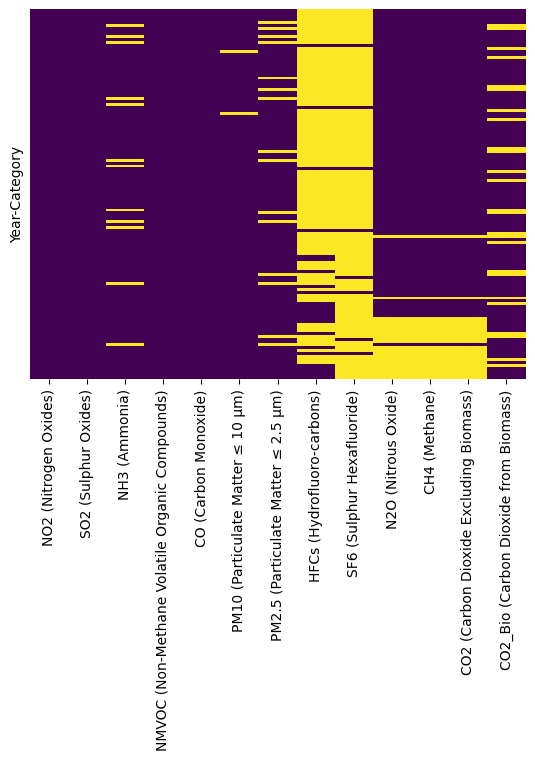

In [406]:
sns.heatmap(emissions_zeroes_proportion == 1, yticklabels=False, cbar=False, cmap="viridis")

The heatmap displays a grid where each cell represents a combination of 'Year' and 'Category', and the color indicates whether the proportion of zeroes in that group is 1 (all zeroes) or not.

The data is missed in specific categories (most probably because the greenhouse gas was not emitted) or in a specific year (like 2021, because some of the data there was omitted). Let's elaborate:

1) NH3 emissions for Household Heating are always 0, for Construction AND Information and Telecommunications are significantly low.
2) PM10 emissions for Other Service Activities are significantly low, sometimes even 0 (no emissions or too low).
3) PM2_5 emissions for some categories are really low, could be 0 (no emissions or too low), for Domestic Transportation AND Household Heating are omitted.
4) HFCs emissions are omitted in Electricity, gas, steam and air conditioning supply AND Household Heating, in some categories are significantly low or 0 (no emissions or too low).
5) SF6 emissions are omitted in Electricity, gas, steam and air conditioning supply for 2016, 2017, 2018, 2019 years, in some categories are significantly low or 0 (no emissions or too low).
6) N2O emissions for Other Service Activities are significantly low, sometimes even 0 (no emissions or too low). Omitted in 2021.
7) CH4 emissions for Other Service Activities are significantly low, sometimes even 0 (no emissions or too low). Omitted in 2021.
8) CO2 emissions for Other Service Activities are significantly low, sometimes even 0 (no emissions or too low). Omitted in 2021.
9) CO2 bio emissions for Other Service Activities AND Construction AND Public administration and defence; compulsory social security AND Mining and quarrying AND Domestic Transportation are significantly low, sometimes even 0 (no emissions or too low).

And the last one is to make another data frames, that will be a total by categories:

In [407]:
gas_emissions.columns

Index(['NO2 (Nitrogen Oxides)', 'SO2 (Sulphur Oxides)', 'NH3 (Ammonia)',
       'NMVOC (Non-Methane Volatile Organic Compounds)',
       'CO (Carbon Monoxide)', 'PM10 (Particulate Matter ≤ 10 μm)',
       'PM2.5 (Particulate Matter ≤ 2.5 μm)', 'HFCs (Hydrofluoro-carbons)',
       'SF6 (Sulphur Hexafluoride)', 'N2O (Nitrous Oxide)', 'CH4 (Methane)',
       'CO2 (Carbon Dioxide Excluding Biomass)',
       'CO2_Bio (Carbon Dioxide from Biomass)'],
      dtype='object')

In [408]:
columns_to_sum = ['NO2 (Nitrogen Oxides)', 'SO2 (Sulphur Oxides)', 'NH3 (Ammonia)',
       'NMVOC (Non-Methane Volatile Organic Compounds)',
       'CO (Carbon Monoxide)', 'PM10 (Particulate Matter ≤ 10 μm)',
       'PM2.5 (Particulate Matter ≤ 2.5 μm)', 'HFCs (Hydrofluoro-carbons)',
       'SF6 (Sulphur Hexafluoride)', 'N2O (Nitrous Oxide)', 'CH4 (Methane)',
       'CO2 (Carbon Dioxide Excluding Biomass)',
       'CO2_Bio (Carbon Dioxide from Biomass)']

In [409]:
totals_by_category_and_gas = gas_emissions.groupby('Category')[columns_to_sum].sum()

In [410]:
totals_by_category = pd.DataFrame({'Total Gas Emissions': totals_by_category_and_gas.sum(1)})

Now saving the necessary datasets to create a visualisation in powerbi for a proper analysis:

In [411]:
file_path = r'C:\Users\untry\OneDrive\project_csv\gas_emissions.csv'

In [412]:
file_path1 = r'C:\Users\untry\OneDrive\project_csv\totals_by_category.csv'

In [413]:
gas_emissions.to_csv(file_path, index=False)

In [414]:
totals_by_category.to_csv(file_path1, index=False)